=== Daily Correlation Matrix ===
              BTC   Gold  SPI_TR  RealEstate  GovBond  SP500_TR
BTC         1.000  0.105   0.086       0.079    0.014     0.253
Gold        0.105  1.000   0.002       0.036    0.113     0.073
SPI_TR      0.086  0.002   1.000       0.168   -0.016     0.299
RealEstate  0.079  0.036   0.168       1.000    0.036     0.151
GovBond     0.014  0.113  -0.016       0.036    1.000    -0.023
SP500_TR    0.253  0.073   0.299       0.151   -0.023     1.000

=== BTC vs Others (Daily) ===
GovBond       0.014
RealEstate    0.079
SPI_TR        0.086
Gold          0.105
SP500_TR      0.253
Name: BTC, dtype: float64

✅ Saved: C:\Users\yanni\OneDrive\Dokumente\Hochschule Luzern Master\Masterarbeit\CorrelationMatrix_Daily.xlsx


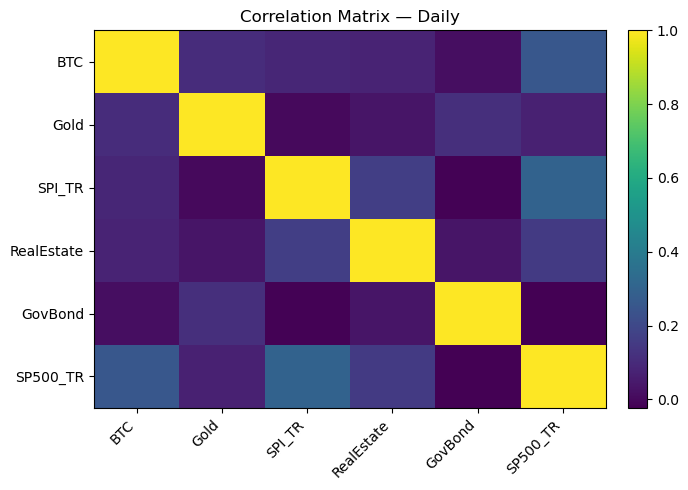

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========= 1) File paths to your saved return workbooks =========
base = r"C:\Users\yanni\OneDrive\Dokumente\Hochschule Luzern Master\Masterarbeit"

paths = {
    "BTC":      fr"{base}\Data_Masterthesis_BTCCHF_returns.xlsx",
    "Gold":     fr"{base}\Data_Masterthesis_GoldCHF_returns.xlsx",
    "SPI_TR":   fr"{base}\Data_Masterthesis_SPITRCHF_returns.xlsx",
    "RealEstate": fr"{base}\Data_Masterthesis_RealEstateCHF_returns.xlsx",
    "GovBond":  fr"{base}\Data_Masterthesis_GovBondCHF_returns.xlsx",
    "SP500_TR": fr"{base}\Data_Masterthesis_SP500TR_returns.xlsx",
    # "ETH":    fr"{base}\Data_Masterthesis_ETHCHF_returns.xlsx",  # add later
}

# The sheet names and return column names we standardized earlier:
sheets_daily = {
    "BTC": "BTCCHF daily + ret",
    "Gold": "GoldCHF daily + ret",
    "SPI_TR": "SPITRCHF daily + ret",
    "RealEstate": "RealEstateCHF daily + ret",
    "GovBond": "GovBondCHF daily + ret",
    "SP500_TR": "SP500TR daily + ret",
    # "ETH": "ETHCHF daily + ret",
}

ret_cols = {
    "BTC": "BTC_ret",
    "Gold": "Gold_ret",
    "SPI_TR": "SPI_TR_ret",
    "RealEstate": "RealEstate_ret",
    "GovBond": "GovBond_ret",
    "SP500_TR": "SP500_TR_ret",
    # "ETH": "ETH_ret",
}

# ========= 2) Load daily log returns and merge by common dates =========
def load_daily_returns():
    frames = []
    for name, p in paths.items():
        sheet = sheets_daily.get(name)
        if sheet is None:
            continue
        try:
            df = pd.read_excel(p, sheet_name=sheet, index_col=0, parse_dates=True)
            col = ret_cols[name]
            s = df[[col]].rename(columns={col: name})
            frames.append(s)
        except Exception as e:
            print(f"⚠️ Skipping {name}: {e}")
    if not frames:
        raise ValueError("No daily series loaded.")
    data = pd.concat(frames, axis=1, join="inner").dropna()
    return data

daily = load_daily_returns()

# ========= 3) Compute Pearson correlation matrix =========
corr_daily = daily.corr(method="pearson")

print("=== Daily Correlation Matrix ===")
print(corr_daily.round(3))

# Optional: BTC-only correlation vector
if "BTC" in corr_daily.columns:
    print("\n=== BTC vs Others (Daily) ===")
    print(corr_daily.loc["BTC"].drop("BTC").sort_values().round(3))

# ========= 4) Save to Excel =========
out_path = fr"{base}\CorrelationMatrix_Daily.xlsx"
with pd.ExcelWriter(out_path, engine="openpyxl") as w:
    corr_daily.to_excel(w, sheet_name="Corr_Daily")
print("\n✅ Saved:", out_path)

# ========= 5) Simple Heatmap (Matplotlib) =========
def plot_heatmap(mat, title):
    fig, ax = plt.subplots(figsize=(7, 5))
    im = ax.imshow(mat.values, aspect='auto')
    ax.set_xticks(range(len(mat.columns)))
    ax.set_xticklabels(mat.columns, rotation=45, ha='right')
    ax.set_yticks(range(len(mat.index)))
    ax.set_yticklabels(mat.index)
    ax.set_title(title)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

plot_heatmap(corr_daily, "Correlation Matrix — Daily")


=== Weekly Correlation Matrix (aligned to Friday) ===
              BTC   Gold  SPI_TR  RealEstate  GovBond  SP500_TR
BTC         1.000 -0.006   0.028       0.087    0.026     0.165
Gold       -0.006  1.000   0.023       0.156    0.152     0.045
SPI_TR      0.028  0.023   1.000       0.280    0.066     0.375
RealEstate  0.087  0.156   0.280       1.000    0.208     0.286
GovBond     0.026  0.152   0.066       0.208    1.000     0.087
SP500_TR    0.165  0.045   0.375       0.286    0.087     1.000

=== BTC vs Others (Weekly, aligned) ===
Gold         -0.006
GovBond       0.026
SPI_TR        0.028
RealEstate    0.087
SP500_TR      0.165
Name: BTC, dtype: float64

✅ Saved: C:\Users\yanni\OneDrive\Dokumente\Hochschule Luzern Master\Masterarbeit\CorrelationMatrix_Weekly.xlsx


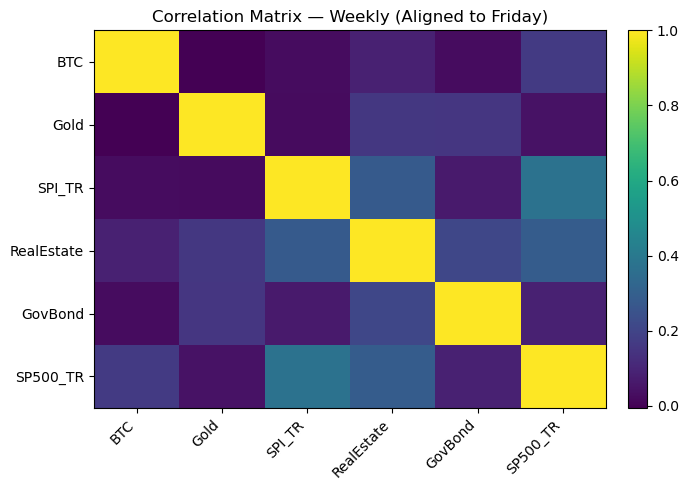

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========= 1) File paths to your saved weekly return workbooks =========
base = r"C:\Users\yanni\OneDrive\Dokumente\Hochschule Luzern Master\Masterarbeit"

paths = {
    "BTC":        fr"{base}\Data_Masterthesis_BTCCHF_returns.xlsx",
    "Gold":       fr"{base}\Data_Masterthesis_GoldCHF_returns.xlsx",
    "SPI_TR":     fr"{base}\Data_Masterthesis_SPITRCHF_returns.xlsx",
    "RealEstate": fr"{base}\Data_Masterthesis_RealEstateCHF_returns.xlsx",
    "GovBond":    fr"{base}\Data_Masterthesis_GovBondCHF_returns.xlsx",
    "SP500_TR":   fr"{base}\Data_Masterthesis_SP500TR_returns.xlsx",
    # "ETH":      fr"{base}\Data_Masterthesis_ETHCHF_returns.xlsx",  # add later
}

sheets_weekly = {
    "BTC":        "BTCCHF weekly + ret",
    "Gold":       "GoldCHF weekly + ret",
    "SPI_TR":     "SPITRCHF weekly + ret",
    "RealEstate": "RealEstateCHF weekly + ret",
    "GovBond":    "GovBondCHF weekly + ret",
    "SP500_TR":   "SP500TR weekly + ret",
    # "ETH":      "ETHCHF weekly + ret",
}

ret_cols = {
    "BTC": "BTC_ret",
    "Gold": "Gold_ret",
    "SPI_TR": "SPI_TR_ret",
    "RealEstate": "RealEstate_ret",
    "GovBond": "GovBond_ret",
    "SP500_TR": "SP500_TR_ret",
    # "ETH": "ETH_ret",
}

# ========= 2) Load weekly returns and align to a common week-end (Friday) =========
def load_weekly_aligned(week_end="W-FRI"):
    frames = []
    for name, p in paths.items():
        sheet = sheets_weekly.get(name)
        if sheet is None: 
            continue
        df = pd.read_excel(p, sheet_name=sheet, index_col=0, parse_dates=True)
        s = pd.to_numeric(df[ret_cols[name]], errors="coerce")
        # Relabel each observation to the common week-end (e.g., Friday)
        idx = pd.to_datetime(df.index).to_period(week_end).to_timestamp(week_end)
        s.index = idx
        # If duplicates after relabel, keep the last observation within the week
        s = s.groupby(s.index).last()
        frames.append(s.rename(name))
    return pd.concat(frames, axis=1, join="inner").dropna(how="any")

weekly = load_weekly_aligned("W-FRI")

# ========= 3) Correlation matrix (Pearson), print & save =========
corr_weekly = weekly.corr(method="pearson")

print("=== Weekly Correlation Matrix (aligned to Friday) ===")
print(corr_weekly.round(3))

# Optional: BTC-only vector
if "BTC" in corr_weekly.columns:
    print("\n=== BTC vs Others (Weekly, aligned) ===")
    print(corr_weekly.loc["BTC"].drop("BTC").sort_values().round(3))

# Save to Excel (same naming pattern as daily)
out_xlsx = fr"{base}\CorrelationMatrix_Weekly.xlsx"
with pd.ExcelWriter(out_xlsx, engine="openpyxl") as w:
    corr_weekly.to_excel(w, sheet_name="Corr_Weekly_WFRI")
print("\n✅ Saved:", out_xlsx)

# ========= 4) Heatmap (Matplotlib, simple like daily) =========
def plot_heatmap(mat, title):
    fig, ax = plt.subplots(figsize=(7, 5))
    im = ax.imshow(mat.values, aspect='auto')  # no explicit colors
    ax.set_xticks(range(len(mat.columns)))
    ax.set_xticklabels(mat.columns, rotation=45, ha='right')
    ax.set_yticks(range(len(mat.index)))
    ax.set_yticklabels(mat.index)
    ax.set_title(title)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

plot_heatmap(corr_weekly, "Correlation Matrix — Weekly (Aligned to Friday)")
